In [21]:
import joblib
from sklearn.preprocessing import StandardScaler
import pandas as pd

model = joblib.load('models/linear_regression_modelV2.joblib')
scaler = joblib.load('models/scaler_model_finalV2.joblib')
df_test_baru = pd.read_csv("content/test.csv")
df_test_baru.info()
X_test_input = df_test_baru.drop(columns=['id'])

print(100*"-")

X_test_baru_scaled = scaler.transform(X_test_input)
X_test_baru_scaled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

array([[4.00058651, 5.99579894, 3.0014458 , ..., 3.99848028, 4.00006439,
        4.9973746 ],
       [4.00058651, 3.99711973, 2.00118345, ..., 3.99848028, 4.00006439,
        2.9985632 ],
       [1.00037551, 2.99778012, 6.00223284, ..., 5.99778445, 7.99931439,
        2.9985632 ],
       ...,
       [5.00065684, 6.99513854, 9.00301988, ..., 4.99813237, 4.99987689,
        3.9979689 ],
       [4.00058651, 6.99513854, 6.00223284, ..., 6.99743653, 4.99987689,
        4.9973746 ],
       [4.00058651, 1.99844052, 5.00197049, ..., 7.99708861, 5.99968939,
        2.9985632 ]], shape=(745305, 20))

In [22]:
predictions = model.predict(X_test_baru_scaled)
predictions

d:\dlan\Latihan Coding\Machine Learning\Deteksi Banjir\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.08984608, 20.29285726, 20.24435127, ..., 27.01086299,
       24.14407491, 22.57416713], shape=(745305,))

In [24]:
# Membuat DataFrame hasil
submission = pd.DataFrame({
    'id': df_test_baru['id'],
    'FloodProbability': predictions
})

# Simpan ke file CSV baru
submission.to_csv('submission_banjir2.csv', index=False)
print("Selesai! File submission_banjir.csv siap dikirim.")

Selesai! File submission_banjir.csv siap dikirim.


<Axes: >

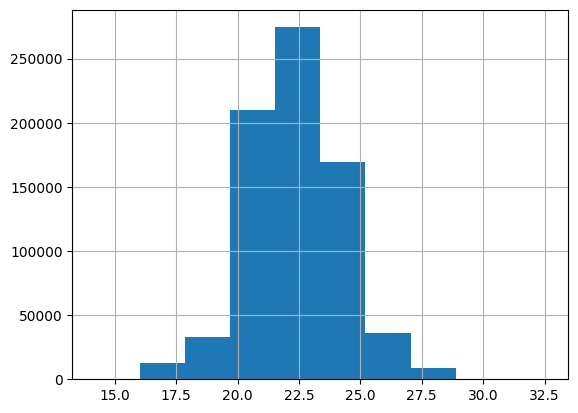

In [25]:
submission['FloodProbability'].hist()